import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = None

# Clean data
df = None


def draw_line_plot():
    # Draw line plot





    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = None

    # Draw bar plot





    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)





    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


In [528]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [529]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)
# df.index = df.index.strftime('%Y-%m')

In [530]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [531]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [532]:
len(df.index)

1304

In [533]:
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

In [534]:
df.index.year

Int64Index([2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='date', length=1238)

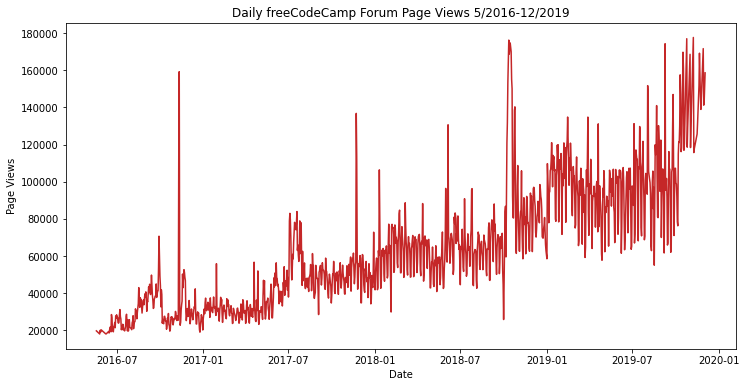

In [535]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df, color='#c52728')

ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')

fig.savefig('line_plot.png')

In [536]:
df_bar = df.groupby([df.index.year, df.index.month]).value.mean().unstack()
df_bar.columns = pd.to_datetime(df_bar.columns, format='%m').month_name().to_list()
df_bar.index.name, df_bar.columns.name = 'Years', 'Months'

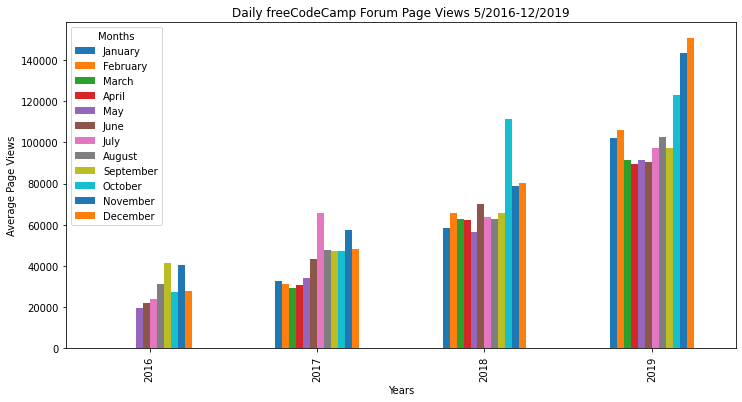

In [537]:
fig, ax = plt.subplots(figsize=(12, 6))

df_bar.plot.bar(ax=ax)

ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_ylabel('Average Page Views')
fig.savefig('bar_plot.png')

In [538]:
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [539]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%m') for d in df_box.date]
df_box['month_name'] = [d.strftime('%b') for d in df_box.date]

In [540]:
df_box.head()

,date,value,year,month,month_name
0,2016-05-19,19736,2016,05,May
1,2016-05-26,18060,2016,05,May
2,2016-05-27,19997,2016,05,May
3,2016-05-28,19044,2016,05,May
4,2016-05-29,20325,2016,05,May


In [541]:
df_box.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1238 non-null   datetime64[ns]
 1   value       1238 non-null   int64         
 2   year        1238 non-null   int64         
 3   month       1238 non-null   object        
 4   month_name  1238 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 48.5+ KB


Text(0, 0.5, 'Page Views')

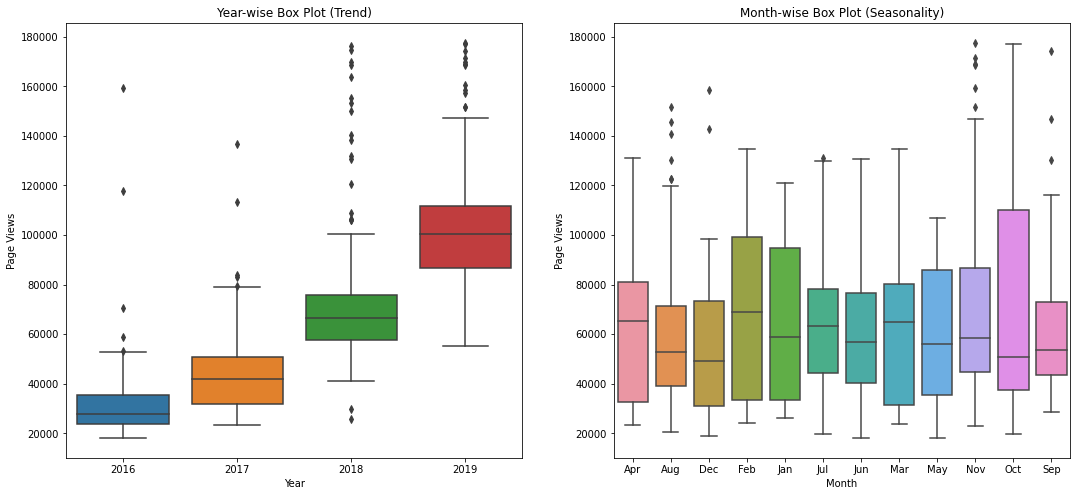

In [558]:
fig, ((ax0, ax1)) = plt.subplots(figsize=(18, 8), nrows=1, ncols=2)

sns.boxplot(x=df_box.date.dt.year, y=df_box.value, ax=ax0)

ax0.set_title('Year-wise Box Plot (Trend)')
ax0.set_xlabel('Year')
ax0.set_ylabel('Page Views')

df_box = df_box.sort_values(by='month')
# df_box['month'] = pd.to_datetime(df_box.month, format='%m').dt.strftime('%b')

sns.boxplot(x=df_box.month, y=df_box.value, ax=ax1)

ax1.set_title('Month-wise Box Plot (Seasonality)')
ax1.set_xlabel('Month')
ax1.set_ylabel('Page Views')